In [34]:
# The goal of this project is to predict car price using Machine Learning. 
# We are going to use the data from Kaggle page (https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho).

In [35]:
# let’s import the libraries we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [36]:
# Loading the dataset using pandas
df = pd.read_csv('car data.csv')

In [37]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Tail
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50         

In [38]:
# It contains 9 columns and 301 rows.
# Columns:
# Car name: This column should be filled with the name of the car.
# Year: This column should be filled with the year in which the car was bought.
# Selling_Price: This column should be filled with the price the owner wants to sell the car at.
# Present_Price: This is the current ex-showroom price of the car.
# Kms_Driven: This is the distance completed by the car in km.
# Fuel_Type: Fuel type of the car.
# Seller_Type: Defines whether the seller is a dealer or an individual.
# Transmission: Defines whether the car is manual or automatic.
# Owner: Defines the number of owners the car has previously had.

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Missing data in percentage
Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


In [39]:
# Let's know the type of data
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [40]:
# Statistical analysis of the data
# count: number of non-null data in column
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: maximum column value
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [41]:
# Categorical Features:

# Fuel_Type       
# Seller_Type       
# Transmission      

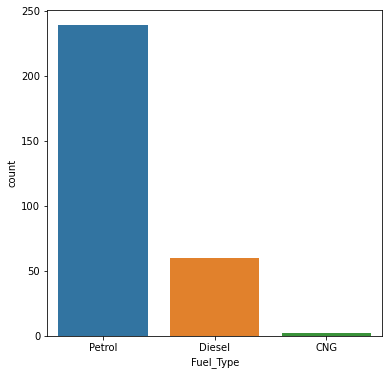

In [42]:
# Fuel_Type 
plt.figure(figsize=(6,6))
sns.countplot(x='Fuel_Type', data=df)
plt.savefig('Fuel_Type.jpg')
plt.show()

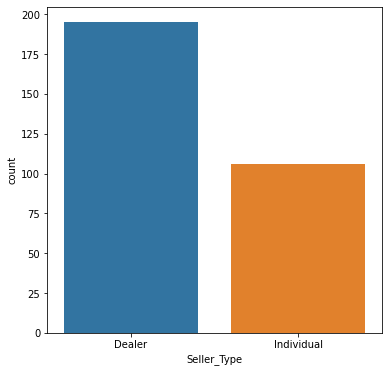

In [43]:
# Seller_Type 
plt.figure(figsize=(6,6))
sns.countplot(x='Seller_Type', data=df)
plt.savefig('Seller_Type.jpg')
plt.show()

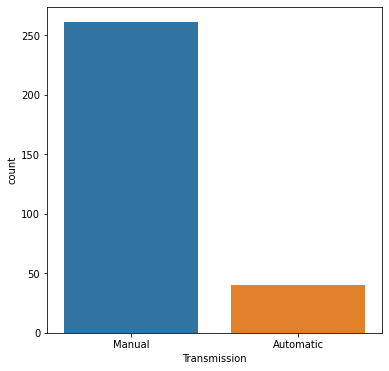

In [44]:
# Transmission 
plt.figure(figsize=(6,6))
sns.countplot(x='Transmission', data=df)
plt.savefig('Transmission.jpg')
plt.show()

In [45]:
# Numerical Features:

# Year               
# Selling_Price    
# Present_Price
# Kms_Driven
# Owner

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


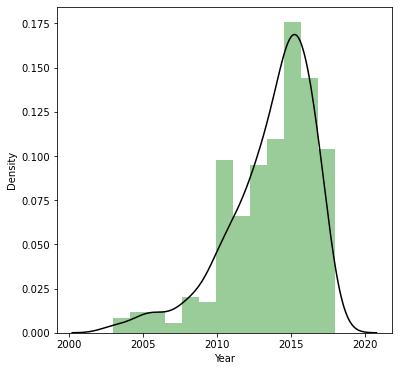

In [46]:
# Year distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Year'], color='green', kde_kws={"color": "k"})
plt.savefig('Year_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


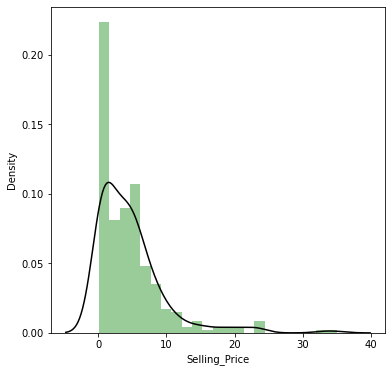

In [47]:
# Selling_Price distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Selling_Price'], color='green', kde_kws={"color": "k"})
plt.savefig('Selling_Price_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


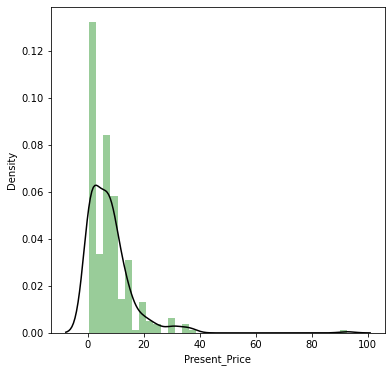

In [48]:
# Present_Price distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Present_Price'], color='green', kde_kws={"color": "k"})
plt.savefig('Present_Price_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


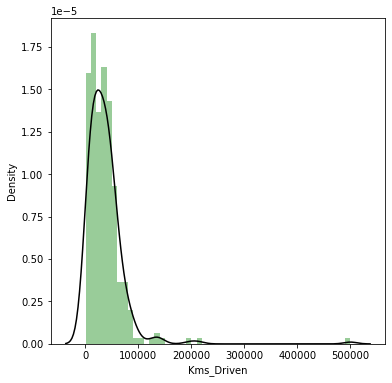

In [49]:
# Kms_Driven distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Kms_Driven'], color='green', kde_kws={"color": "k"})
plt.savefig('Kms_Driven_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


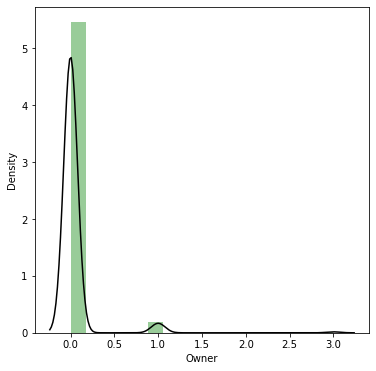

In [50]:
# Owner distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Owner'], color='green', kde_kws={"color": "k"})
plt.savefig('Owner_dist.jpg')
plt.show()

In [51]:
# Encoding the categorical data
# "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [53]:
# Spliting the Features and Target
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [54]:
# Create Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [55]:
## MACHINE LEARNING ##

In [56]:
# Linear Regression

Linear = LinearRegression()
Linear.fit(X_train,Y_train)

Linear_training_prediction = Linear.predict(X_train)

Linear_error_train = metrics.r2_score(Y_train, Linear_training_prediction)

Linear_test_prediction = Linear.predict(X_test)
Linear_error_test = metrics.r2_score(Y_test, Linear_test_prediction)

In [57]:
# Lasso Regression

Lasso = Lasso()
Lasso.fit(X_train,Y_train)

Lasso_training_prediction = Lasso.predict(X_train)

Lasso_error_train = metrics.r2_score(Y_train, Lasso_training_prediction)

Lasso_test_prediction = Lasso.predict(X_test)
Lasso_error_test = metrics.r2_score(Y_test, Lasso_test_prediction)

In [58]:
# Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

RFR_training_prediction = RFR.predict(X_train)

RFR_error_train = metrics.r2_score(Y_train, RFR_training_prediction)

RFR_test_prediction = RFR.predict(X_test)
RFR_error_test = metrics.r2_score(Y_test, RFR_test_prediction)

In [62]:
# R squared Error of models

print('Linear Regression: ', 'Train: ', Linear_error_train, 'Test: ', Linear_error_test)
print('Lasso Regression: ', 'Train: ', Lasso_error_train, 'Test: ', Lasso_error_test)
print('Random Forest Regression: ', 'Train: ', RFR_error_train, 'Test: ', RFR_error_test)

Linear Regression:  Train:  0.8799451660493711 Test:  0.8365766715026396
Lasso Regression:  Train:  0.8427856123435794 Test:  0.8709167941173195
Random Forest Regression:  Train:  0.9840772911224518 Test:  0.9761755502216369
